# PolySense Coding Challenge
---
*Author: Lucas Van Dijck (lucas.vandijck@polysense.ai if you have any questions)*

Welcome to the **polysense coding challenge**! You wil get **two hours** to complete the questions in this notebook. If you have any important questions or remarks, don't hesitate to reach out to us by phone or email.

Yes, we also know there are GenAI tools that can help you program, and... we use them too:) Feel free to do so it they help you achieve a better end result. *The same holds for using the web while making your exercises of course.*

You will get three questions to test your skills:
1. A simple warm-up problem (approx. 10min)
2. A test to see how well you structure complex systems (approx. 30min)
3. A test to check your algorithmic knowledge (approx. 30min)

<div class="alert alert-block alert-info">📌 To track your progress and check your Git skills, we want you to create a repository that contains this notebook.


1. Create a repository that contains this notebook. Just use the "Initial commit" message or something clear.
2. Please invite Lucas to this repo using the username *lucasvandijck*.
3. After you finish question 1, you can create a commit to the repo containing the updated notebook.
4. After question 2, you can create a new commit.
5. After question 3, you can create your final commit.

In total we expect a repository with four commits: the initial commit, Question 1 commit, Question 2 commit, and the final Question 3 commit. 

I should have received a notification from the repository invite, so you don't have to explicitely email me when your done. We can use the commit timings to verify the two hour deadline.</div>

**Have fun and happy programming!**

## 0. Pre-requisites
There are a number of simple packages required, but we will provide you with this install cell to make it easier. If you want to use any additional package, you are free to do so.

In [1]:
!pip install numpy pandas matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.5 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/11.5 MB 5.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.5 MB 7.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.5 MB 8.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.5 MB 8.4 MB/s eta 0:00:02
   ------------ --------------------------- 3.5/11.5 MB 8.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.

## 1. The Warm-Up problem
We all need a warm-up from time to time, so here's yours!

We all know pi (3.1415...), the famous irrational number, but few people know there are some cool tricks to approximate it. Take for example 256/81 (0.6% error), 22/7 (0.04% error), or just 3 (low enough error for general engineering purposes xp). A famous way of approximating pi is using the Monte Carlo method, and this is the one you'll be using today. The Monte Carlo method works as follows:
1. Image a dartboard, it has a radius of 22.55cm. The board is centered in a square with sides of 45.1cm (as in the image below).
2. There's this darts player who is a terrible shot, but somehow they are able to shoot darts perfectly randomly within the square around the board.
3. Let the darts player shoot for a while and record how many darts he threw and how many landed within the darts board.
4. Pi can be approximated by four times the fraction of darts that landed on the board (4 x (landed in board)/(darts thrown)).

![Monte Carlo approximation](https://i.ytimg.com/vi/ELetCV_wX_c/maxresdefault.jpg)

### Question
Fill in the cell below and use the Monte Carlo method to approximate pi to an error percentage lower than 0.01% (we know this process is random so your code will not 100% always reach this boundary, no worries). Aside from approximating pi, we also want to visualise the dartsboard and square:
- The square should be a white rectangle with black border
- The dartsboard should be a solid green circle
- The darts that hit the dartsboard can be visualised using red dots, the others using black dots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Pi approximation:  3.141307155773702
Pi approximation error (%):  0.009087677734575176


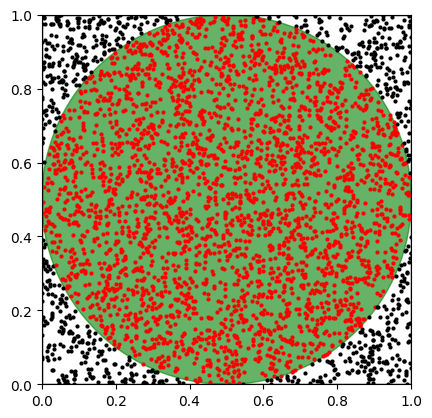

In [2]:
# Square  + dartsboard
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.add_patch(plt.Circle((0.5, 0.5), 0.5, color='green', alpha=0.6))
ax.add_patch(plt.Rectangle((0, 0), 1, 1, fill=None, edgecolor='black'))


def monte_carlo(accuracy):
    total_darts = 0
    darts_in_circle = 0
    all_points = []
    pi_approx = 0
    desired_accuracy = np.pi * accuracy
    
    while True:
        x, y = np.random.rand(2)
        distance = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
        all_points.append((x, y, distance <= 0.5))
        total_darts += 1
        
        if distance <= 0.5:
            darts_in_circle += 1
        
        pi_approx = 4 * (darts_in_circle / total_darts)
        
        if total_darts > 100 and abs(np.pi - pi_approx) < desired_accuracy:
            break

    for x, y, in_circle in all_points:
        if in_circle:
            ax.plot(x, y, 'ro', markersize=2)
        else:
            ax.plot(x, y, 'ko', markersize=2)
    
    return pi_approx, (abs(np.pi - pi_approx)/np.pi)




pi_approx, pi_approx_error = monte_carlo(0.0001)

assert pi_approx_error < 0.01 / 100, "The approximation error is too high"

# In percentage
pi_approx_error *= 100

print("Pi approximation: ", pi_approx)
print("Pi approximation error (%): ", pi_approx_error)

plt.show()

## 2. Plant Hotel

After your darts adventure, you are revolutionising the house plant industry by creating a plant hotel. Here, customers can leave their house plants when they go on holidays for example. The hotel has a 100 spots for plants to stay based on their needs:
- direct sunlight (20),
- indirect sunlight (35),
- shade (45).

The different spots have a different pricing model:
- 3 eur per day for direct sunlight,
- 2.5 eur per day for indirect sunlight,
- 2 eur per day for shade.
Additionally, we also bill the client 50 cents for each watering.

Each plant is an entry with a few properties:
- The type of spot this plant needs (direct sunlight, indirect sunlight, or shade),
- How many days there are in between waterings (so 2 would mean: water - no - no - water - ...),
- The date at which it was dropped off,
- The data at which it will be picked up,
- The customer it belongs to (customer names are unique).

The hotel should support the following functions:
- **Drop**: When a new customer arrives with one or more plants, we want to be able to look up whether there is still room for their plants and if not, how many days they have to wait for all their required spots to free up.
- **Search**: An employee should be able to search the hotel database for the plants that need water on a current day.
- **Pick-up**: When a client comes to pick up their plant, we should empty the plant spot(s) and present the customer with their bill.

You can assume customer names are unique and that customers will always pick up their plants at the agreed upon date. You can also assume plants have been watered on the day they are dropped off at the hotel.

### Question
Implement the *Plant* and *PlantHotelSystem* classes with the required functions:
- Plant(spot: int, days_between_watering: int, drop_off: str, pick_up: str, customer_name: str): a plant data model
- PlantHotelSystem(spots: Tuple[int, int, int], spot_prices: Tuple[float, float, float], watering_fee: float): initialised the plant hotel
- Drop(plants: List[Plant]) -> int: returns the minimal amount of days to wait for these plants to enter the hotel. If zero, the plants are accepted and assigned to their spots.  Otherwise, the customer will have to come back another time.
- Search(date: str) -> List[Plant]: returns a list of plants that need water today
- PickUp(customer_name: str) -> float: empties the plant spots and returns the total price of their stay

Remark: you can change the provided template code as well if that makes it easier to work with.

In [6]:
from typing import Tuple, List

In [12]:
"""
I started this question but I did not complete it, as I had a hard time figuring out some assumptions I could make.
For example, I didn't find out in time how to handle the dates as I'm not sure in which format they are given.

"""


class Plant():
    def __init__(spot: int, days_between_watering: int, drop_off: str, pick_up: str, customer_name: str) -> None:
        """Initialise a plant
        
        Args:
            spot (int): the spot number (0 for direct sunlight, 1 for indirect sunlight, 2 for shade)
            days_between_watering (int): the number of days between watering
            drop_off (str): the drop off date
            pick_up (str): the pick up date
            customer_name (str): the customer's name
        """
        self.spot = spot
        self.days_between_watering = days_between_watering
        self.drop_off = drop_off
        self.pick_up = pick_up
        self.customer_name = customer_name

class PlantHotelSystem():
    def __init__(self,spots: Tuple[int, int, int], spot_prices: Tuple[int, int, int], watering_fee: float) -> None:
        """Initialise the plant hotel
        
        Args:
            spots (Tuple[int, int, int]): the number of spots for each plant type
            spot_prices (Tuple[int, int, int]): the price for each spot
            watering_fee (float): the fee for watering a plant
        """
        self.spots = spots
        self.spot_prices = spot_prices
        self.watering_fee = watering_fee


        self.plants_in_spot_0 = []
        self.plants_in_spot_1 = []
        self.plants_in_spot_2 = []
        self.spot_list = [self.plants_in_spot_0,self.plants_in_spot_1,self.plants_in_spot_2]

        print(self.spots)
        print(self.spot_prices)
        print(self.watering_fee)

    def drop(self, plants: List[Plant]) -> int:
        """Drop off plants
        
        Args:
            plants (List[Plant]): the plants to drop off
        
        Returns:
            int: the amount of days to wait for these plants to be able to enter the system.
                If 0, the plants can enter immediately, otherwise, the customer will have to come back another time.
        """

        for plant in plants:
            if len(self.spot_list[plant.spot]) + 1 > self.spots[plant.spot]:
                print("No more room for plant")
                continue
        # TODO
            
            

    def search(self, date: str) -> List[Plant]:
        """Search for plants that need water today
        
        Args:
            date (str): the date to search for
        
        Returns:
            List[Plant]: the plants that need water today
        """
        pass

    def pick_up(self, customer_name: str) -> float:
        """Pick up plants
        
        Args:
            customer_name (str): the customer's name
        
        Returns:
            float: the total price for the plants picked up
        """
        pass

hotel = PlantHotelSystem((20,35,45),(3,2.5,2),0.5)

(20, 35, 45)
(3, 2.5, 2)
0.5


# 3. Water Catchment Analysis

In order to water all of the plants in your hotel sustainably, you need to collect rainwater. However, you don't really have any good infrastructure, so you will just place boxes in a line (yes, your garden is two-dimensional) around to trap rain as it comes down. In the picture provided with the notebook, you can see what that might look like. The grey tiles are blocks and the blue tiles represent units of water that is collected by the grey blocks.

## Question
The input of your algorithm is a list of n non-negative integers, representing the amount of blocks you placed in a line in your garden (e.g. [0, 0, 3, 0, 1, 1, 2, 0, 4, 2]). Your goal is to calculate how many units of rain you can collect with this arangement, in this case 11.

Some constraints:
- 1 <= n <= 1000
- 0 <= height[i] <= 1000

In [13]:
from typing import List

In [49]:
def calculate_catchment(heights: List[int]) -> int:
    """Calculate the catchment area in your garden
    
    Args:
        heights (List[int]): the heights of the blocks
        
    Returns:
        int: the total catchment area
    """

    # Remove 0's in the beginning and the end, as the water will flow away from the sides, just like in the picture

    # I assume there will never be a list with only 0's in it as input
    i = 0
    to_remove_left = 0
    while heights[i] == 0:
        to_remove_left += 1
        i += 1

    i = len(heights)-1
    to_remove_right = 0
    while heights[i] == 0:
        to_remove_right += 1
        i -= 1

    heights = heights[to_remove_left:len(heights)-to_remove_right]

    # The amount of water above each block is determined by
    # the maximum height to the left and to the right of the block

    n = len(heights)
    left_max = [0] * n
    right_max = [0] * n

    # find the maximum height from the start to index i
    left_max[0] = heights[0]
    for i in range(1, n):
        left_max[i] = max(left_max[i-1], heights[i])

    # find the maximum height from the end to index i
    right_max[n-1] = heights[n-1]
    for i in range(n-2, -1, -1):
        right_max[i] = max(right_max[i+1], heights[i])

    total_water = 0
    for i in range(n):
        total_water += min(left_max[i], right_max[i]) - heights[i]
    
    return total_water

print(calculate_catchment([0, 0, 3, 0, 1, 1, 2, 0, 4, 2]))
print(calculate_catchment([0, 0, 4, 0, 1, 1, 2, 0, 4, 2]))
print(calculate_catchment([0, 0, 5, 0, 1, 1, 2, 0, 5, 2]))

11
16
21


## Feedback
Some short questions to end off the coding challenge, so we know how well we did. You can score each questions from 1 to 5 with 1 being "strongly disagree" and 5 being "strongly agree":
- The challenges were interesting and fun to work on: 5
- The difficulty of the challenges was what I expected: 4
- The provided time was enough to complete all tasks: 3
- I did well in general: 3
  - Question 1: 4
  - Question 2: 1
  - Question 3: 4
- I used the internet during this challenge: 3
- I used GenAI tools during this challenge: 4